# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # for Celsius
    units = "metric"  

    # Create endpoint URL with each city    
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | bay city
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | makoua
Processing Record 8 of Set 1 | al kharj
Processing Record 9 of Set 1 | san antonio de pale
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | san ignacio de velasco
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | quelimane
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | pemba
Processing Record 20 of Set 1 | rio de janeiro
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | banjar
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,12.07,80,89,0.89,AU,1715696917
1,tralee,52.2704,-9.7026,13.14,94,75,2.06,IE,1715696917
2,bay city,43.5945,-83.8889,11.17,78,100,4.63,US,1715696918
3,ilulissat,69.2167,-51.1000,-4.99,68,75,3.09,GL,1715696919
4,carnarvon,-24.8667,113.6333,22.41,66,0,3.18,AU,1715696919


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,12.07,80,89,0.89,AU,1715696917
1,tralee,52.2704,-9.7026,13.14,94,75,2.06,IE,1715696917
2,bay city,43.5945,-83.8889,11.17,78,100,4.63,US,1715696918
3,ilulissat,69.2167,-51.1000,-4.99,68,75,3.09,GL,1715696919
4,carnarvon,-24.8667,113.6333,22.41,66,0,3.18,AU,1715696919


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

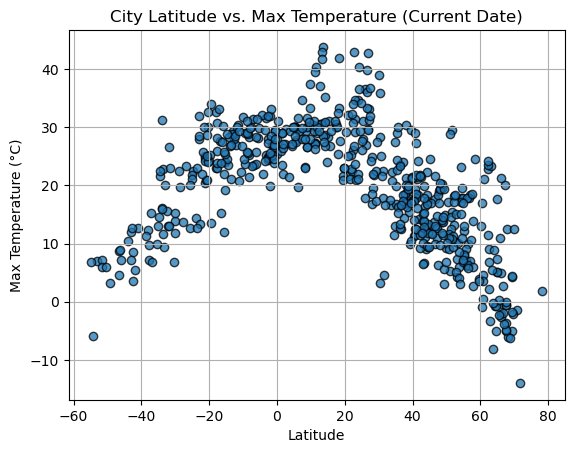

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

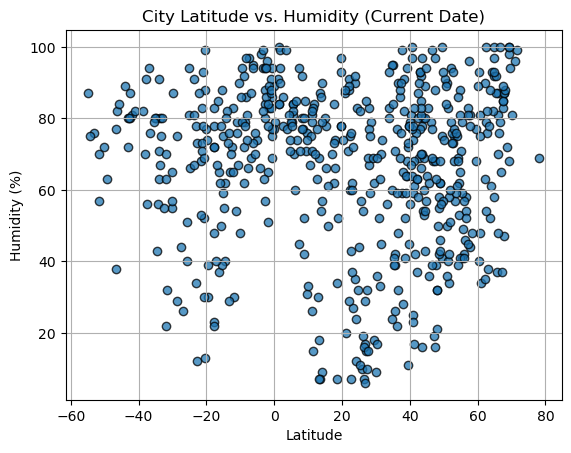

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

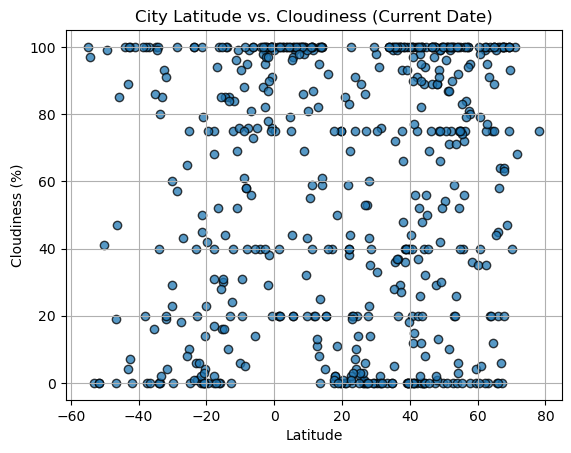

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

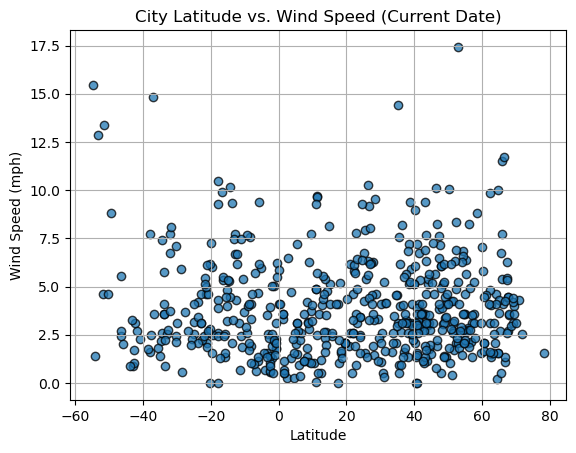

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.text(text_coordinates[0], text_coordinates[1], line_eq, fontsize=12, color="red")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"{title} vs. Latitude Linear Regression")

    # Print r-value
    print(f"The r-value is: {rvalue}")

    # Save the plot as a figure
    plt.savefig(f"output_data/{title}_vs_Latitude_LinearRegression.png")

    # Show plot
    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tralee,52.2704,-9.7026,13.14,94,75,2.06,IE,1715696917
2,bay city,43.5945,-83.8889,11.17,78,100,4.63,US,1715696918
3,ilulissat,69.2167,-51.1000,-4.99,68,75,3.09,GL,1715696919
5,st. john's,47.5649,-52.7093,6.27,97,100,7.15,CA,1715696920
6,makoua,0.0069,15.6333,25.34,89,100,4.09,CG,1715696921


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,12.07,80,89,0.89,AU,1715696917
4,carnarvon,-24.8667,113.6333,22.41,66,0,3.18,AU,1715696919
8,san antonio de pale,-1.4014,5.6325,26.90,83,38,5.05,GQ,1715696922
9,punta arenas,-53.1500,-70.9167,7.06,76,0,12.86,CL,1715696922
11,san ignacio de velasco,-16.3667,-60.9500,15.23,65,100,5.32,BO,1715696923


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.792742176160544


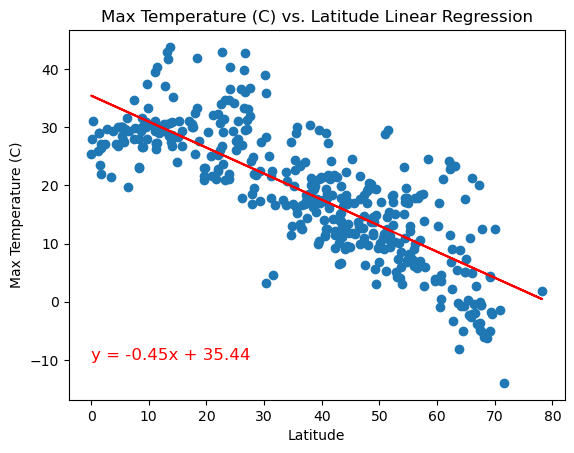

In [24]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature (C)", (0,-10))

The r-value is: 0.7977873031227118


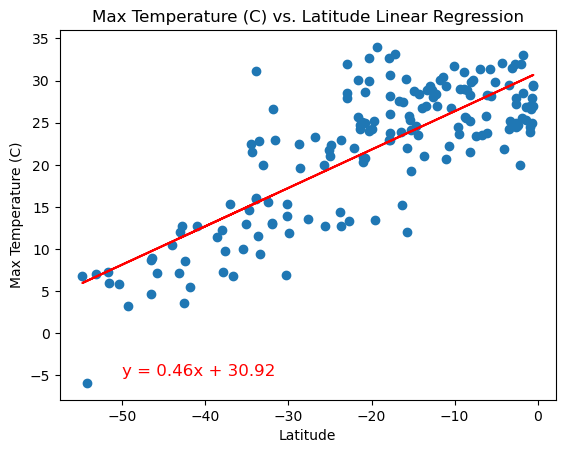

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature (C)", (-50,-5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Based on the r-value and linear equation the lat and the temperature are very much related and has a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07344224637014252


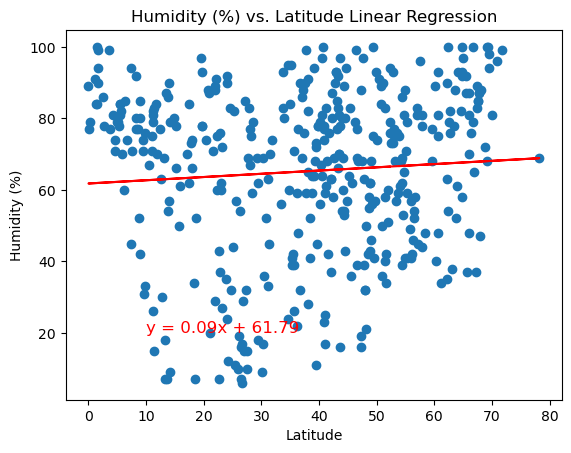

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (10,20))

The r-value is: 0.14574366080328532


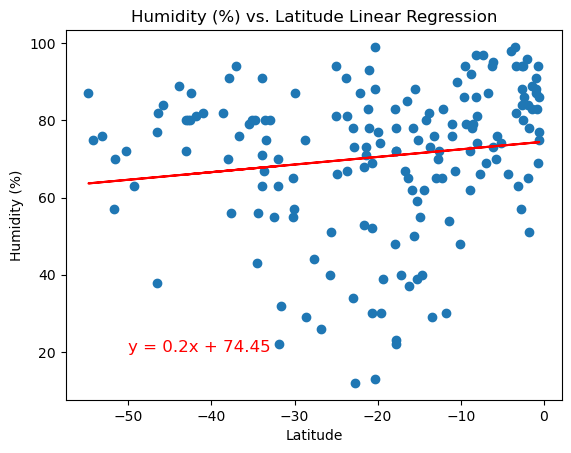

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (-50,20))

**Discussion about the linear relationship:** The r-value is small but still it shows a positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05299558680331094


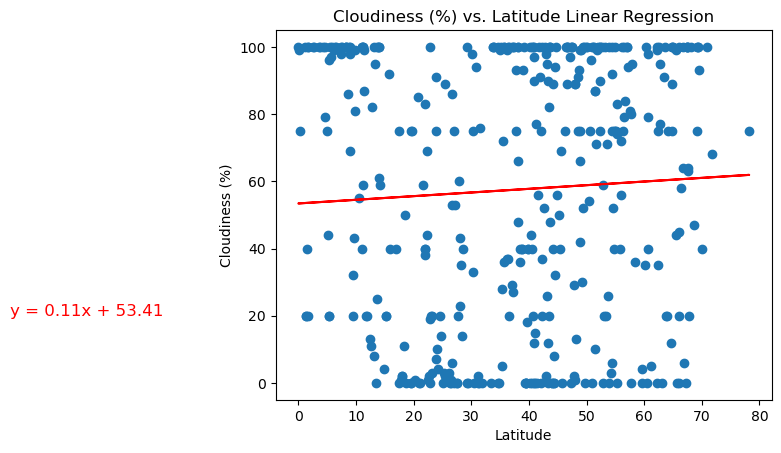

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,20))

The r-value is: 0.2448588270927945


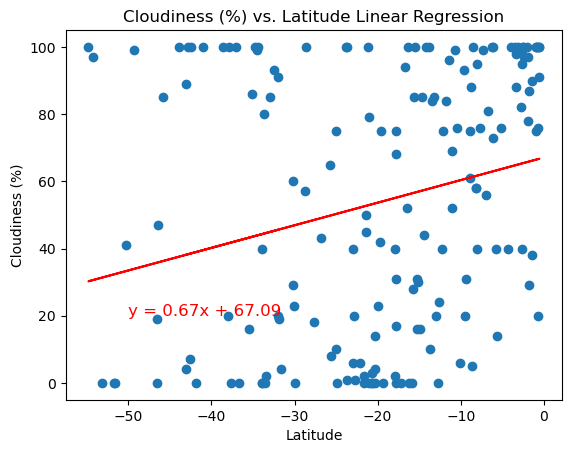

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** Based on the r-value and linear equation the lat and the cloudiness are very much related and has a positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10402565747773601


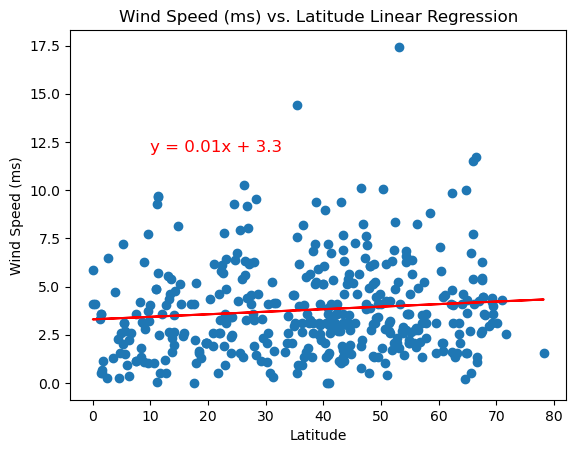

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (ms)", (10,12))


The r-value is: -0.20813137931934172


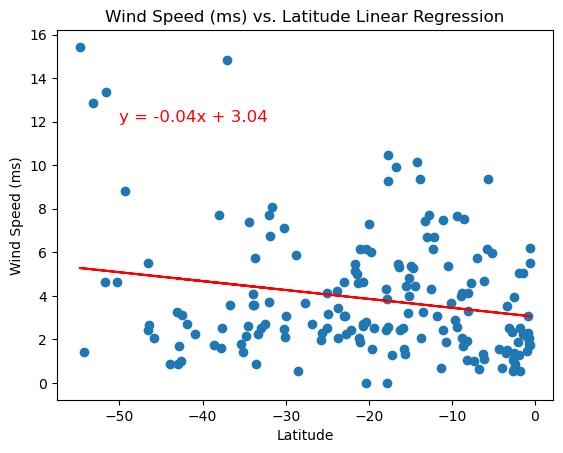

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (ms)", (-50,12))

**Discussion about the linear relationship:** Based on the r-value and linear equation there is a negative correlation between lat and wind speed.